# Electrical characteristic analysis of sample CA12X2

Electrical characterization experiment of current biased Ca2RuO4 crystal along C-axis as a function of temperature with 2-wire connection

Name of the sample: CA12_X2

- Area: 4.807e-2cm2
- Thickness: 0.2376e-1cm


# Experiment 20220315152213 ###
Date 2022-03-15 start at 15:19:48 end at 15:21:59 duration 0:02:11

Current source from 100e-9 to 200e-9

Temperature range from 113.45°K to 113.45°K

![title](CA12X2/Ca12x2_Info/camp_ca12x2.jpg)

## Diffrattogramma

![title](CA12X2/Ca12x2_Info/Ca_X2_drx.JPG)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from datetime import datetime

plt.rcParams['figure.figsize'] = [20, 6]

## Loading experiment data

In [5]:
data_path = 'CA12X2/CA12X2_current_from_100e-9_to_200e-9A/CA12X2_current_from_100e-9_to_200e-9A-20220315152213'

In [8]:
data=np.load(data_path + ".npz", allow_pickle=True)
DT = data['datetime']
V = data['voltage']
R = data['resistance']
T = data['temperature']
I = data['current_source']
J = data['current_density']
E = data['electric_field']
RHO = data['resistivity']
        
thickness = V/E
area = I/J
# Density in mA/cm2
J = J * 1000

### Data description

- DT datetime
- V voltage measurements in Volts
- R resistance measurements in Ohm
- T temperature measurements in °K
- I current source in Amps
- J current density in mA/cm^2
- E electric field in V/cm
- RHO resistivity in Ohm cm

In [9]:
print(f"Area {area[0]:.4e}cm2\nThickness:{thickness[0]:.4e}cm")

Area 4.8070e-02cm2
Thickness:2.3760e-02cm


### Temperature

In [10]:
diff = np.max(T) - np.min(T)
if diff <= 0.1: 
     print(f"Temperature is constant: {T[0]:.2f}°K")   
elif diff <= 1: 
    print(f"Temperature is quite constant, average value: {np.average(T):.2f}°K difference between min and max {np.max(T) - np.min(T):.2f}°K")
else:
    print(f"Temperature span from {np.min(T):.2f}°K to {np.max(T):.2f}°K")


Temperature is constant: 113.45°K


### Input source

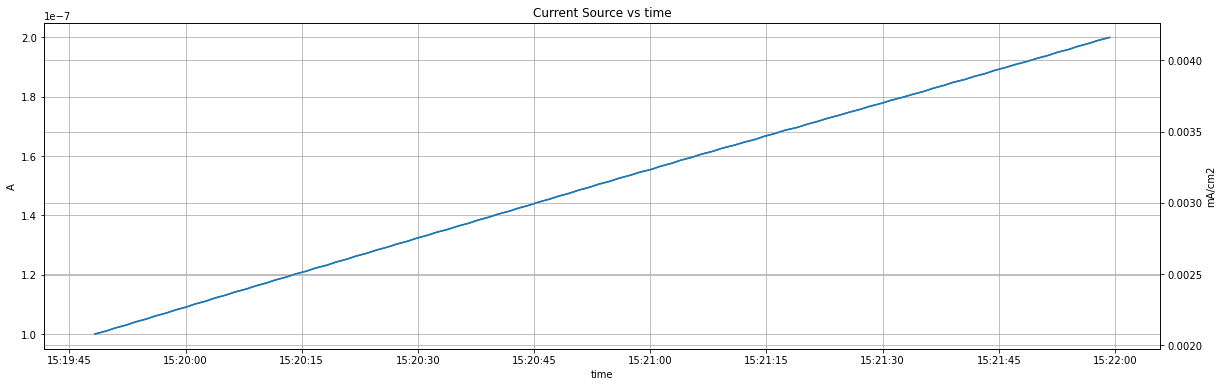

In [11]:
fig, ax1 = plt.subplots()
ax1.set_title("Current Source vs time")
ax1.set_xlabel('time')
ax1.set_ylabel('A')
ax1.plot(DT, I)
ax2 = ax1.twinx()
ax2.set_ylabel('mA/cm2')
ax2.plot(DT, J)
ax1.grid(True)
ax2.grid(True)

In [12]:
if I[0] == I[-1]: 
    print(f"Source is constant: {I[0]:.2e} A -- {J[0]:.2e} mA/cm2")
else:
    print(f"Source span from {np.min(I):.2e} A to {np.max(I):.2e} A -- {np.min(J):.2e} to {np.max(J):.2e} mA/cm2")


Source span from 1.00e-07 A to 2.00e-07 A -- 2.08e-03 to 4.16e-03 mA/cm2


## Time analysis

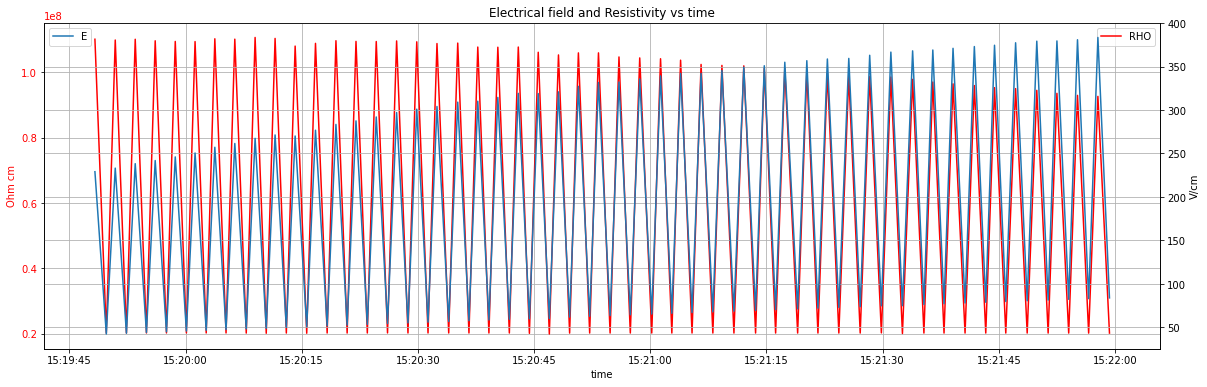

In [13]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field and Resistivity vs time")
ax1.set_xlabel('time')
ax1.set_ylabel('Ohm cm', color='red')
ax1.tick_params(axis='y', labelcolor='r')
ax1.plot(DT, RHO, color='red', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(DT, E, label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax1.grid(True)
ax2.grid(True)

### Peaks detection

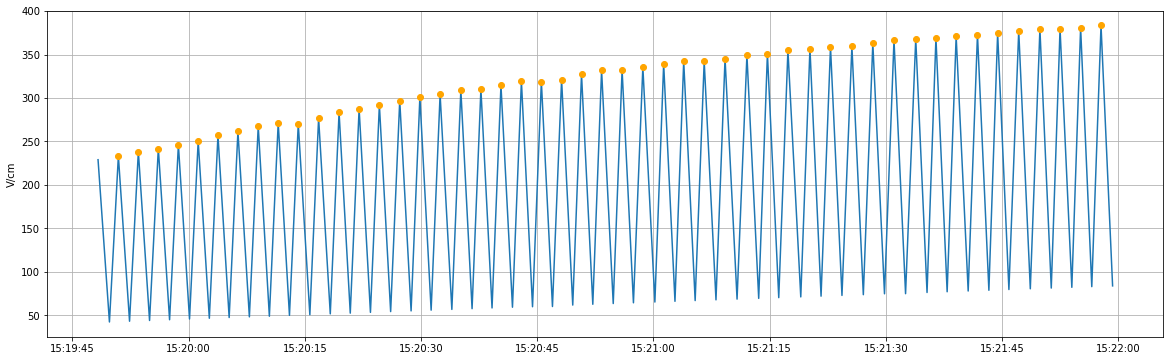

In [14]:
# Individuazione dei picchi
peaks, _ = signal.find_peaks(E)
# Larghezza, Ampiezza base, inizio e fine dei picchi
widths, values, start, end = signal.peak_widths(E, peaks, rel_height=1)
plt.plot(DT, E)
plt.plot(DT[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
#plt.plot(DT[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, DT[istart.astype(int)], DT[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Time interval between peaks [ms]

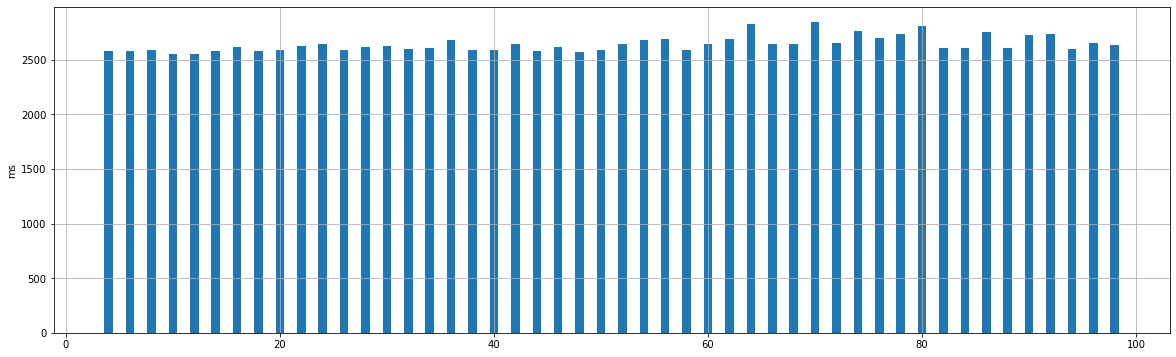

In [15]:
diff = np.ediff1d(DT[peaks].astype(np.datetime64))
plt.ylabel('ms')
plt.bar(peaks[1:], diff.astype(int)/1000)
plt.grid(True)

## Current source analysis

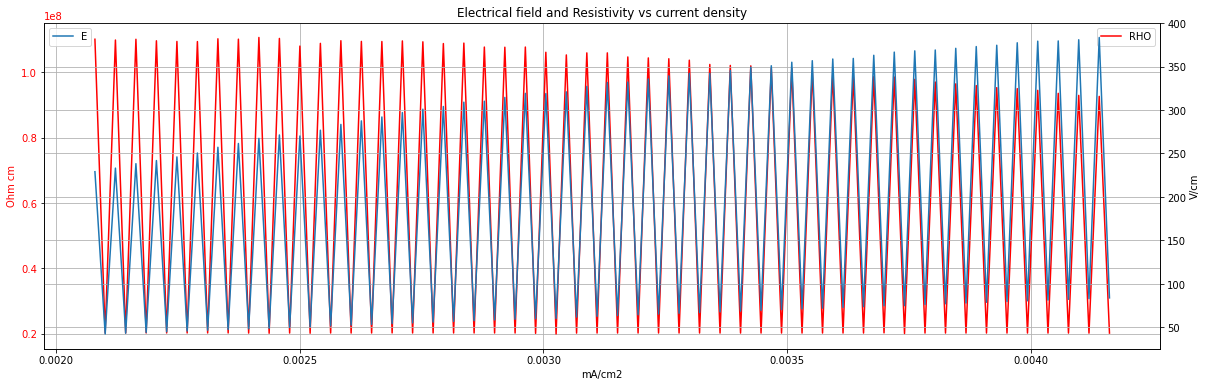

In [16]:
fig, ax1 = plt.subplots()
ax1.set_title("Electrical field and Resistivity vs current density")
ax1.set_xlabel('mA/cm2')
ax1.set_ylabel('Ohm cm', color='red')
ax1.tick_params(axis='y', labelcolor='r')
ax1.plot(J, RHO, color='red', label='RHO')
ax2 = ax1.twinx()
ax2.set_ylabel('V/cm')
ax2.plot(J, E, label='E')
ax1.legend(loc='upper right')
ax2.legend(loc='upper left')
ax1.grid(True)
ax2.grid(True)

### Peaks detection

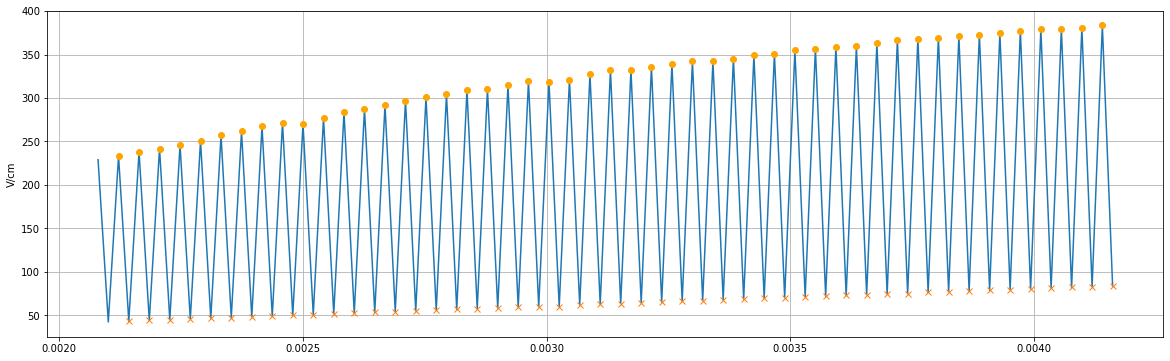

In [17]:
plt.plot(J, E)
plt.plot(J[peaks], E[peaks], 'o', c='orange')
istart = np.rint(start)
iend = np.rint(end)
plt.plot(J[iend.astype(int)], E[iend.astype(int)], 'x')
#plt.hlines(values, J[istart.astype(int)], J[iend.astype(int)], color="C3")
plt.ylabel('V/cm')
plt.grid(True)

#### Starting and ending point of the peaks

In [18]:
print(f"First peak at {J[peaks[0]]:.4e} mA/cm2 with value {E[peaks[0]]:.1f} V/cm\nLast  peak at {J[peaks[-1]]:.4e} mA/cm2 with value {E[peaks[-1]]:.1f} V/cm")

First peak at 2.1223e-03 mA/cm2 with value 233.2 V/cm
Last  peak at 4.1396e-03 mA/cm2 with value 383.4 V/cm


#### Peaks amplitude

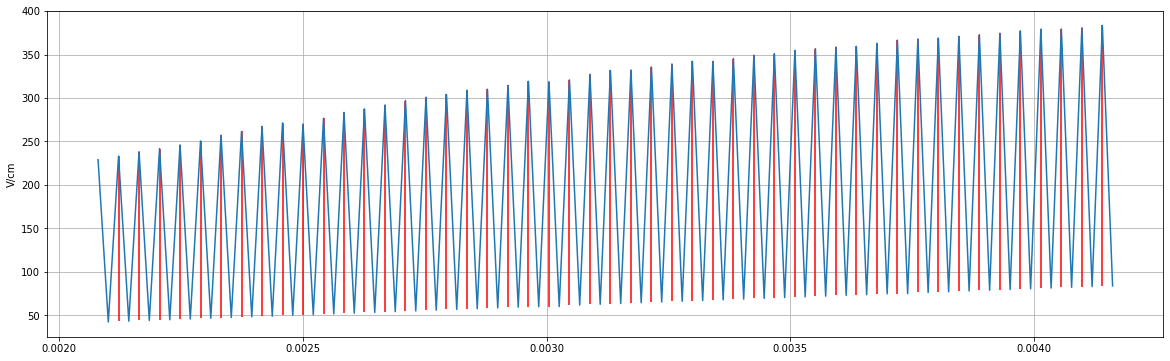

In [19]:
plt.plot(J, E)
plt.vlines(J[peaks], values, E[peaks], color='red')
plt.ylabel('V/cm')
plt.grid(True)

In [20]:
diff = E[peaks]-values
print(f"Minimum amplitude {np.min(diff):.1f} V/cm\nMaximum amplitude {np.max(diff):.1f} V/cm\nAverage amplitude {np.average(diff):.1f} V/cm")

Minimum amplitude 189.8 V/cm
Maximum amplitude 299.4 V/cm
Average amplitude 258.4 V/cm


#### Distance between peaks

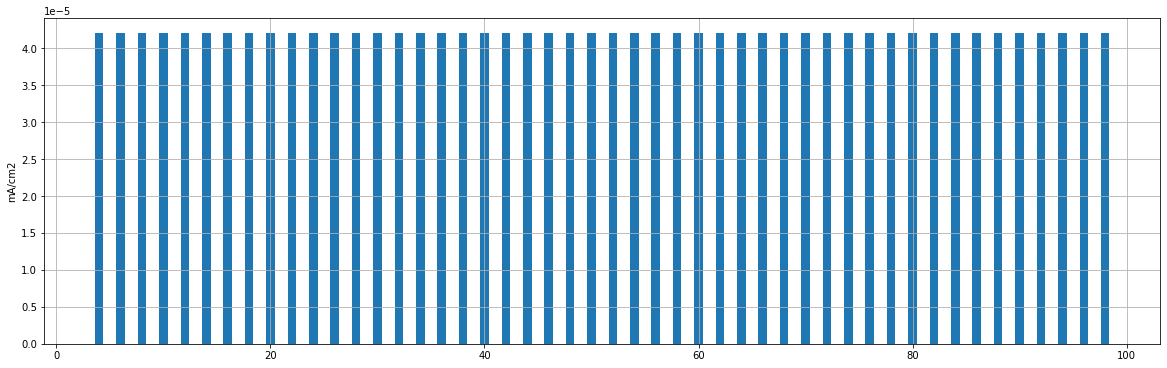

In [21]:
diff = np.ediff1d(J[peaks])
plt.ylabel('mA/cm2')
plt.bar(peaks[1:], diff)
plt.grid(True)

In [22]:
print(diff, "mA/cm2")

[4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05
 4.20262538e-05 4.20262538e-05 4.20262538e-05 4.20262538e-05] mA/cm2
